In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df1=pd.read_csv('train-data.csv')

In [3]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#getting the number of roews and columns

In [5]:
df1.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [6]:
#getting the information about the data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
#chceking the null values 
df1.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
# Deleting New_Price column since it has too many null values

df1.drop("New_Price", axis = 1, inplace = True)

In [9]:
# removing Unnamed: 0 since it has no role

df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [10]:
#Converting string data to numeric form, i.e removing units etc.
df1['Mileage'] = pd.to_numeric(df1['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
df1['Engine'] = pd.to_numeric(df1['Engine'].str.lower().str.split().str.get(0), errors='coerce')
df1['Power'] = pd.to_numeric(df1['Power'].str.lower().str.split().str.get(0), errors='coerce')

In [11]:
df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [12]:
df1['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(df1['Mileage']))
df1['Mileage'].fillna(value=np.mean(df1['Mileage']),inplace=True)

Mean of Mileage = 18.342252479408355


In [ ]:
#we can also fill missing values like this

In [ ]:
train_data["Power"].mean()
train_data["Power"].fillna(train_data["Power"].mean(), inplace = True)

In [13]:
df1['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(df1['Engine']))
df1['Engine'].fillna(value=np.mean(df1['Engine']),inplace=True)

Mean of Engine = 1621.276449941501


In [14]:
df1['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats =",np.mean(df1['Seats']))
df1['Seats'].fillna(value=np.mean(df1['Seats']),inplace=True)

Mean of Seats = 5.2796184738955825


In [16]:
df1['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(df1['Power']))
df1['Power'].fillna(value=np.mean(df1['Power']),inplace=True)

Mean of Power = 113.25304969366827


In [17]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [18]:
#converting name into cars
cars=df1['Name'].str.lower().unique()

In [19]:
num_cars=len(cars)

In [20]:
print(num_cars)

1852


In [21]:
#Q.)Which company sells most Number of cars

In [22]:
companies=df1['Name'].str.lower().str.split().str.get(0).unique()

In [23]:
len(companies)

30

In [24]:
companies

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini'],
      dtype=object)

In [25]:
company_count=df1['Name'].str.lower().str.split().str.get(0).to_frame()["Name"].value_counts()

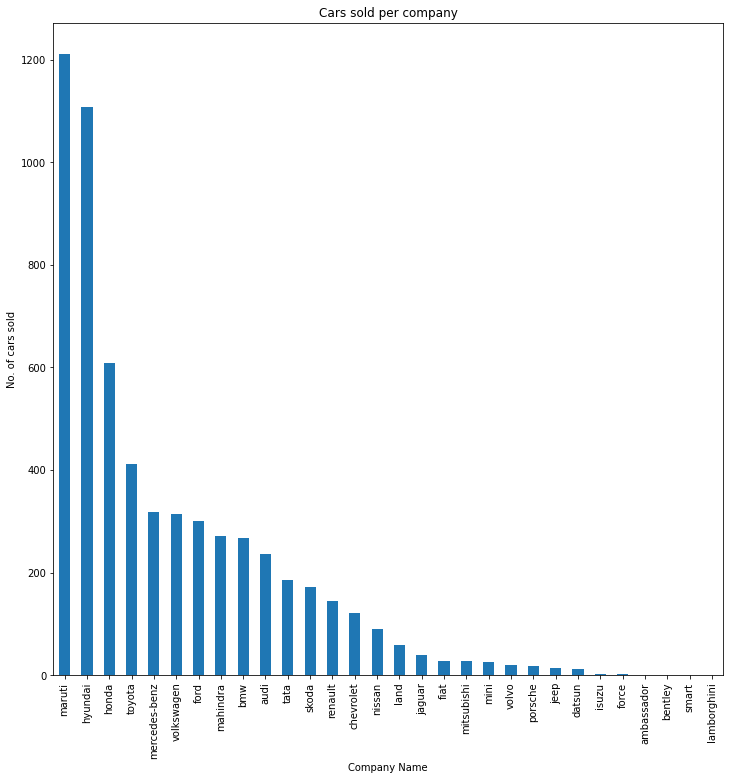

In [26]:
plt.figure(figsize=(12,12))
plt.xlabel('Company Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
company_count.plot(kind='bar')

In [27]:
#Maruti followed by hyundai has the most number of selling cars

In [28]:
Q.)Which fuel Type has lesser mileage?

Object `mileage` not found.


In [30]:
print("Minimum Mileage in the data is:",df1.Mileage.min())
print("Maximum Mileage in the data is:",df1.Mileage.max())
print("Range of Mileage is from {} to {}".format(df1.Mileage.min(),df1.Mileage.max()))

Minimum Mileage in the data is: 6.4
Maximum Mileage in the data is: 33.54
Range of Mileage is from 6.4 to 33.54


In [31]:
df1.Mileage.mean()

18.342252479408376

In [32]:
df1[df1.Mileage > 18.33].Name.count()

3011

In [33]:
df1[df1.Mileage < 18.33].Name.count()

3003

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


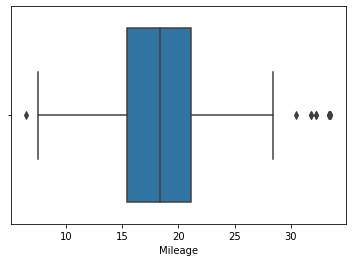

In [34]:
sns.boxplot(df1['Mileage'])

In [36]:
#ANALYSIS ON ENGINE

In [37]:
print("Minimum engine volume in the data is:",df1.Engine.min())
print("Maximum engine volume in the data is:",df1.Engine.max())
print("Range of engine volume is from {} to {}".format(df1.Engine.min(),df1.Engine.max()))


Minimum engine volume in the data is: 72.0
Maximum engine volume in the data is: 5998.0
Range of engine volume is from 72.0 to 5998.0


In [39]:
df1[df1.Engine==72].Name

4446    Mahindra E Verito D4
Name: Name, dtype: object

In [40]:
df1[df1.Engine==5998].Name


5521    Bentley Continental Flying Spur
Name: Name, dtype: object

In [41]:
df1[df1.Engine==5998].Name


5521    Bentley Continental Flying Spur
Name: Name, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


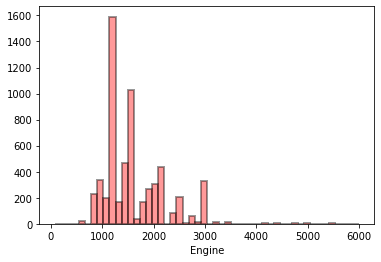

In [42]:
sns.distplot(df1['Engine'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2), color='red')

In [43]:
# Dropping Name Column

df1.drop(["Name", "Location"], axis = 1, inplace = True)

In [44]:
df1.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
import datetime
trai['Total Years'] = datetime.datetime.now().year - train_data["Year"]

In [45]:
df1['current_year']=2021

In [46]:
df1.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,current_year
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,2021
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,2021
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,2021
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,2021
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2021


In [47]:
df1['no_year']=df1['current_year']-df1['Year']

In [54]:
df1.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_year
0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [55]:
df1.drop(['Year','current_year'], axis = 1, inplace = True)

KeyError: ignored

In [56]:
df1.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_year
0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [57]:
df1 =pd.get_dummies(df1,drop_first=True)

In [58]:
df1.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,no_year,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998.0,58.16,5.0,1.75,11,0,0,0,0,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,12.50,6,1,0,0,0,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,4.50,10,0,0,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,6.00,9,1,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,17.74,8,1,0,0,0,0,0,1,0


In [59]:
#checking the correlation
df1.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,no_year,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Kilometers_Driven,1.000000,-6.418931e-02,0.091029,0.033419,0.084164,-0.011493,0.173048,0.104441,-2.345021e-03,0.000549,-0.103907,0.025663,0.032659,0.062143,0.045405
Mileage,-0.064189,1.000000e+00,-0.639787,-0.548488,-0.345653,-0.329891,-0.290570,0.111266,2.234026e-16,0.010248,-0.144140,0.358558,-0.037124,-0.117119,-0.078155
Engine,0.091029,-6.397867e-01,1.000000,0.859020,0.397367,0.657118,0.051712,0.426749,-2.087046e-02,-0.040411,-0.406900,-0.499082,0.019378,0.042432,0.019114
Power,0.033419,-5.484878e-01,0.859020,1.000000,0.100559,0.767331,-0.013895,0.288974,-1.926825e-02,-0.040880,-0.268738,-0.638835,-0.004626,0.030194,0.003455
Seats,0.084164,-3.456528e-01,0.397367,0.100559,1.000000,0.053134,-0.011785,0.307505,-6.348028e-03,-0.014204,-0.300972,0.073794,0.041564,-0.005337,0.012137
Price,-0.011493,-3.298914e-01,0.657118,0.767331,0.053134,1.000000,-0.305327,0.320645,5.533751e-03,-0.025499,-0.309363,-0.586025,-0.021445,-0.073552,-0.055297
no_year,0.173048,-2.905696e-01,0.051712,-0.013895,-0.011785,-0.305327,1.000000,-0.126185,-7.907273e-04,0.031919,0.127490,0.097059,0.077886,0.297913,0.231184
Fuel_Type_Diesel,0.104441,1.112660e-01,0.426749,0.288974,0.307505,0.320645,-0.126185,1.000000,-1.945705e-02,-0.043536,-0.977528,-0.141613,0.001790,-0.025779,-0.042125
Fuel_Type_Electric,-0.002345,2.234026e-16,-0.020870,-0.019268,-0.006348,0.005534,-0.000791,-0.019457,1.000000e+00,-0.000744,-0.016699,-0.028823,-0.000706,-0.007981,-0.002522
Fuel_Type_LPG,0.000549,1.024823e-02,-0.040411,-0.040880,-0.014204,-0.025499,0.031919,-0.043536,-7.437447e-04,1.000000,-0.037366,0.025804,-0.001579,0.004350,-0.005643


In [60]:
corrmat=df1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

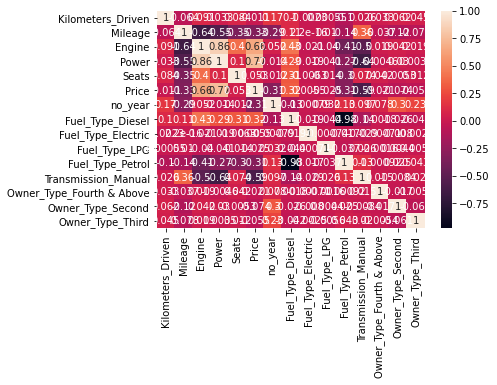

In [62]:
g=sns.heatmap(df1[top_corr_features].corr(),annot=True)

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6019 non-null   int64  
 1   Mileage                    6019 non-null   float64
 2   Engine                     6019 non-null   float64
 3   Power                      6019 non-null   float64
 4   Seats                      6019 non-null   float64
 5   Price                      6019 non-null   float64
 6   no_year                    6019 non-null   int64  
 7   Fuel_Type_Diesel           6019 non-null   uint8  
 8   Fuel_Type_Electric         6019 non-null   uint8  
 9   Fuel_Type_LPG              6019 non-null   uint8  
 10  Fuel_Type_Petrol           6019 non-null   uint8  
 11  Transmission_Manual        6019 non-null   uint8  
 12  Owner_Type_Fourth & Above  6019 non-null   uint8  
 13  Owner_Type_Second          6019 non-null   uint8

In [75]:
#to solve level continuous problems
df1['Price'] = df1['Price'].astype(int)


In [76]:
#Build Model Now..


In [77]:
X = df1.drop(['Price'], axis=1)
y = df1['Price']

In [78]:
#spliting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)  
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3023255813953488

In [91]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred = lr.predict(X_test)

In [93]:
lr.score(X_test,y_test)


0.47929137446557957

In [94]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
accuracy_score(y_test,y_pred)

0.33056478405315615